# Feature Engineering Experimentation

This notebook analyzes feature transformations, PCA, and weighting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from src.preprocessing import run_preprocessing_pipeline
from src.features import FeatureEngine
from src import config

## 1. Load and Preprocess Data

In [2]:
# This can take a moment to fit the scaler
data_df = run_preprocessing_pipeline(config.RAW_DATA_PATH)
data_df.head()

Fitting pipeline...
Pipeline saved to c:\Users\dhruv\Desktop\compri learning\projects\songrecomendation\artifacts\scalers\preprocessing_pipeline.joblib


,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_0,explicit_1
0,-1.782825,-2.15247,1.276187,-1.467013,4.763146,-1.013988,2.268102,2.626719,-1.514237,-1.256808,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.650688,-2.15247,0.611347,1.598779,-0.399747,-0.528270,-0.532771,-0.262229,-0.170766,-1.210993,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.858821,-2.15247,1.220340,-1.188820,2.133824,-1.182122,2.379754,-0.599749,-0.593551,-1.210993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.381564,-2.15247,1.236296,-1.489722,-0.166101,-0.647832,-0.532682,1.002043,0.377680,-1.302624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.047180,-2.15247,1.209703,-0.677855,-0.509485,-1.081242,-0.532765,0.132499,0.240788,-1.348440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## 2. Feature Engine Initialization

In [3]:
engine = FeatureEngine(data_df)
features, popularity = engine.extract_baseline_features()
print("Features shape:", features.shape)
print("Popularity shape:", popularity.shape)

Features shape: (170653, 27)
Popularity shape: (170653,)


## 3. PCA Analysis

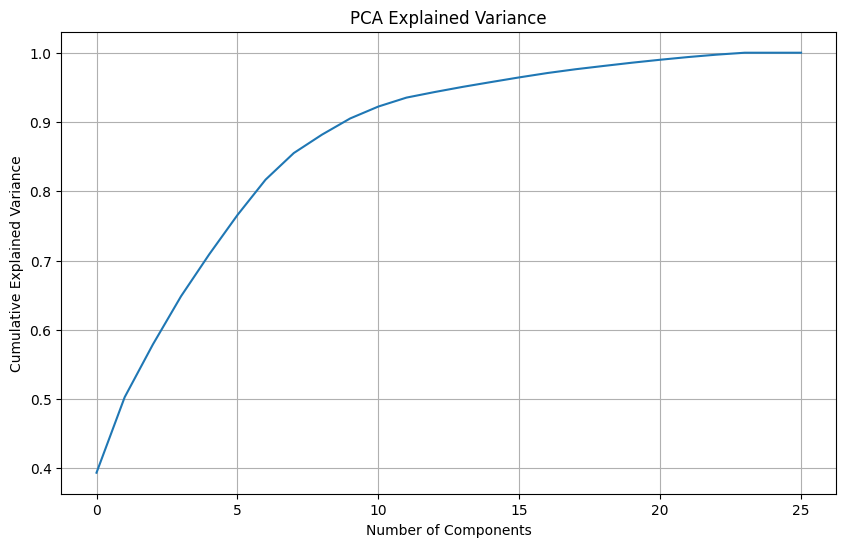

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26)
pca.fit(features)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

## 4. Feature Weighting Effect

Applying feature weighting: {'energy': 2.0}...


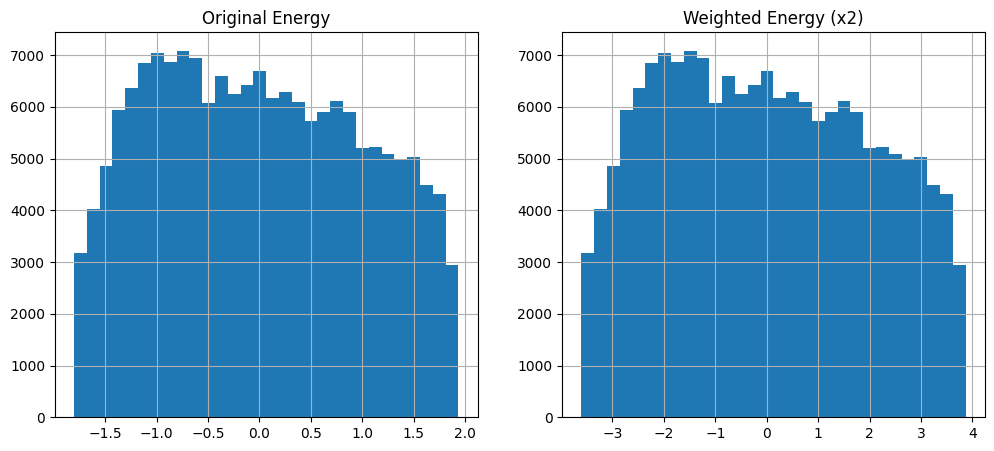

In [5]:
# Visualize effect of weighting energy
if 'energy' in features.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    features['energy'].hist(bins=30)
    plt.title('Original Energy')
    
    # Apply weight
    engine.apply_feature_weighting({'energy': 2.0})
    
    plt.subplot(1, 2, 2)
    engine.features['energy'].hist(bins=30)
    plt.title('Weighted Energy (x2)')
    
    plt.show()